
# Basics of Machine Learning

Tutorial held at University of Zurich, 23-24 March 2016

(c) 2016 Jan Šnajder (<jan.snajder@fer.hr>), FER, University of Zagreb

<i>Version: 0.3 (2016-03-22)</i>

In [1]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from numpy.random import normal
from SU import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Outline

* Typical steps in applying an ML algorithm

* Instance space

* Hypothesis

* Empirical error

* Training a model

* Model complexity

* Inductive bias

* The three ingredients of every ML algorithm

* Algo 1: Logistic regression

* Feature mapping

* Hyperparameters

* The problem of noise

* Model selection

* Cross-validation

* Regularization

* Algo 2: Support vector machine (SVM)

* Kernel trick

* Algo 3: Decision tree

* Algo 4: Naive Bayes classifier

# Scipy stack

<img src="http://ww2.sinaimg.cn/large/5396ee05jw1etyjkwzuo3j20jn0estco.jpg" width="70%" align="left">

# An example: Titanic survivors

# Typical steps in applying an ML algorithm



1. Data preparation (cleansing and wrangling)

2. Data annotation

3. Feature engineering

4. **Dimensionality reduction / feature selection**

5. **Model selection**

6. **Model training**

7. **Model evaluation**

8. **Diagnostics and debugging**

9. Deployment


* 1-3 and 8 are task-specific

* ML focuses on 4-8

* We will focus on 5-7

# Instance space


* Instance space (input space): $\mathcal{X}$


* Input space dimensionality: $n$


* An instance is a vector living in the input space: $\mathbf{x} = (x_1, x_2, \dots, x_n)^T \in \mathcal{X}$


* Label: $y$ (a discrete value or a number)


* Class labels: $\mathcal{Y} = \{0, \dots, K\}$
  * Number of classes: $K$
  * Binary classification: $K=2$, $\mathcal{Y} = \{0,1\}$ or $\mathcal{Y} = \{-1,+1\}$


* Number of instances: $N$


* Labeled dataset: $\mathcal{D} = \big\{(x^{(i)}, y^{(i)})\big\}_{i=1}^N \subseteq \mathcal{X}\times\mathcal{Y}$

* In matrix form:

$$
\begin{array}{lllll|l}
&x_1 & x_2 & \cdots & x_n & \mathbf{y}\\
\hline
\mathbf{x}^{(1)} = & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} & y^{(1)}\\
\mathbf{x}^{(2)} = & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} & y^{(2)}\\
& \vdots\\
\mathbf{x}^{(N)} = & x_1^{(N)} & x_2^{(N)} & \cdots & x_n^{(N)} & y^{(N)}\\
\end{array}
$$

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


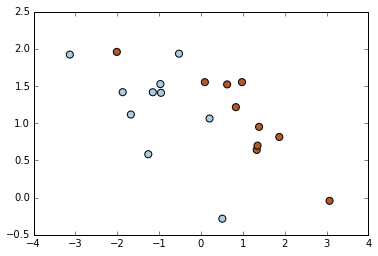

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
plot_problem(X, y)

In [3]:
X

array([[ 1.33179045,  0.64072355],
       [ 0.97937244,  1.55196227],
       [-1.25927537,  0.58288797],
       [ 0.20444953,  1.06321842],
       [-0.97079887,  1.52603684],
       [-2.01091632,  1.95867481],
       [-0.52499688,  1.93462756],
       [ 1.35081166,  0.69891036],
       [ 0.83348371,  1.21572686],
       [-1.67574392,  1.11661718],
       [ 0.62489791,  1.52136993],
       [-0.95615816,  1.40844091],
       [ 0.51007374, -0.28340397],
       [ 0.09269522,  1.55160105],
       [-1.87075433,  1.41710158],
       [ 3.07189921, -0.04310145],
       [ 1.87126674,  0.81500347],
       [ 1.38794437,  0.95108957],
       [-3.13407211,  1.92244913],
       [-1.1518197 ,  1.41609435]])

In [4]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

# Hypothesis

* Hypothesis: $h : \mathcal{X} \to \mathcal{Y}$
  * Assigns class labels to each instance from the instance space


* Binary classification: $h : \mathcal{X} \to \{0, 1\}$ or $h : \mathcal{X} \to \{-1, +1\}$
  

* More generally, a hypothesis is a function  $h(\mathbf{x} | \boldsymbol\theta)$, defined up to a vector of parameters $\boldsymbol\theta$


* For example, a **linear classifier**: 

$$\boldsymbol\theta = (w_0, w_1, w_2)$$

$$h(x_1,x_2|w_0,w_1,w_2) = \mathbf{1}\{w_0 + w_1 x_1 + w_2 x_2 \geq 0\}$$


In [5]:
def h(x, w) : return 1 if w[0] + w[1] * x[0] + w[2] * x[1] >= 0 else 0

In [6]:
def h0(x) : return h(x, [0, 0.5, -0.5])

In [7]:
print h0([0, -11])

1


In [8]:
h0([-2, 2])

0

* A linear classifier divides the input space into two half-spaces
  * $h(\mathbf{x}) \geq 0$ - instances labeled as $y=1$
  * $h(\mathbf{x})=0$ - the boundary
  * $h(\mathbf{x}) \leq 0$ - instances labeled as $y=0$

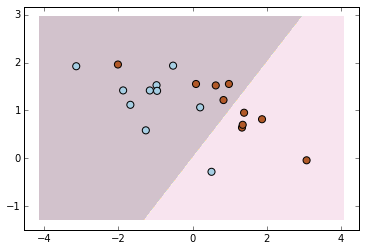

In [9]:
plot_problem(X, y, h0)

# Model

* Model $\mathcal{H}$: a set of hypotheses $h$
  * Often referred to as a "hypothesis space" or "parameter space"


* Formally: $\mathcal{H} = \big\{ h(\mathbf{x} | \boldsymbol\theta)\big\}_{\boldsymbol\theta}$
  * A family of functions parametrized with $\boldsymbol\theta$
  

* E.g., a linear classification model (here $\boldsymbol\theta = \mathbf{w}$):  


In [10]:
def h(x, w) : return 1 if w[0] + w[1] * x[0] + w[2] * x[1] > 0 else 0

* A couple of different hypotheses from this model:

In [11]:
def h0(x) : return h(x, [0, 0.5, -0.5])
def h1(x) : return h(x, [1, 1, 2.0])
def h2(x) : return h(x, [-1, 2, 1])

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


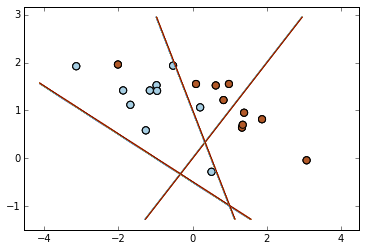

In [12]:
for hx in [h0, h1, h2] : plot_problem(X, y, hx, surfaces=False)

# Empirical error

* Given a hypothesis $h$, what can we say about its accuracy (or error)?


* True accuracy depends on the distribution of instances. We don't know the true distribution, so we have to assume that it is similar to the distribution in our dataset


* **Empirical error** is the observed error of our hypothesis on the dataset that we have available
  * Tells us how accurate a hypothesis is on our labeled dataset


* **Misclassification error:**

$$
E(h|\mathcal{D}) 
= \frac{1}{N} \sum_{i=1}^N \mathbf{1}\{h(\mathbf{x})^{(i)} \neq y^{(i)}\}
$$

* [Example]


* Error inflicted on a single instance is called the **loss function**
  * $L\big(y^{(i)}, h(\mathbf{x}^{(i)})\big) = \mathbf{1}\{h(\mathbf{x})^{(i)} \neq y^{(i)}\}$ is called a **zero-one loss**

In [13]:
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score

def misclassification_error(h, X, y) : 
    error = 0
    for xi, yi in zip(X, y):
        if h(xi) != yi : error += 1
    return float(error) / len(X)

In [14]:
misclassification_error(h0, X, y)

0.3

In [15]:
misclassification_error(h1, X, y)

0.5

In [16]:
misclassification_error(h2, X, y)

0.1

# Training a model

* Training (=learning) a model amounts to **searching** a hypothesis space $\mathcal{H}$ for the **best** hypothesis $h\in \mathcal{H}$


* The best hypothesis: one that classifies the instances **most accurately**
  
  
* This is an optimization problem!
  
  
* [Example: Input space + hypothesis space]


* $\mathcal{H}$ is typically very large, hence we need smart search methods

# Model complexity


* Ideally, in model $\mathcal{H}$ there is a hypothesis $h$ that is perfectly accurate, i.e., $E(h|\mathcal{D}) = 0$, and ideally we will be able to find it


* More often than not, no such $h$ exists in the model, i.e.,  $\forall h\in\mathcal{H}. E(h|\mathcal{D}) > 0$


* We then say that the model $\mathcal{H}$ is **not complex enough** (or has not a sufficient capacity)


* [Example]


* [Exercise: six instances]

# Some more theory: Inductive bias

* Learning a hypothesis is an **ill-defined problem**: $h$ is not logically entailed from $\mathcal{D}$


* Example 1: Learning a Boolean function

\begin{array}{ccc|c}
x_1 & x_2 & x_3 & y\\
\hline
0&0&0&\color{red}{\textbf{?}}\\
0&0&1&\color{red}{\textbf{?}}\\
0&1&0&1\\
0&1&1&0\\
1&0&0&1\\
1&0&1&0\\
1&1&0&\color{red}{\textbf{?}}\\
1&1&1&1\\
\end{array}


* **Generalization** - the ability to classify previously unseen instances


* Learning and generalization are not possible without **additional assumptions**
  * *Futility of bias-free learning*


* **Inductive bias** - the set of additional assumptions that make $h(x)$ follow deductively from the set of labeled instances $\mathcal{D}$


* "A set of assumptions that turn induction into deduction"


* Two flavors:

  * **Language bias**: the model $\mathcal{H}$ limits the number of hypotheses from which we can choose from $\Rightarrow$ defines **where** we search
  
  * **Preference bias**: we prefer one hypothesis over the other $\Rightarrow$ defines **how** we search
  
  
* Most ML algorithms combine both types of bias


* [Example 2: Input space + parameter space]


* Excercise: 
  * Learning a Boolean function in $\mathcal{X}=\{0,1\}$, $\mathcal{H}$ is a set of lines
  * Q: What kind of bias do we have here?
  * Q: How many different hypotheses does the model have?
  * Q: Is the model complex enough to perfectly classify all possible labelings?
  


# Three ingredients of every ML algorithm


### (1) The model $\mathcal{H}$

* $\mathcal{H} = \big\{ h(\mathbf{x} | \boldsymbol\theta)\big\}_{\boldsymbol{\theta}}$


### (2) Error function

* The expected value (= average) of the loss function on all instances


* Because the true distribution $P(\mathbf{x}, y)$ is unknown to us, we compute instead the **empirical error** on the set $\mathcal{D}$ (= the average loss on the dataset):
$$E(h|\mathcal{D}) = E(\boldsymbol\theta|\mathcal{D}) = \frac{1}{N} \sum_{i=1}^N L\big(y^{(i)}, h(\mathbf{x}^{(i)})\big)$$
  
  
* NB: Instead of working with an error function $E(\boldsymbol\theta|\mathcal{D})$, the **generative models** (e.g., the Bayes classifier) work with a **likelihood function** $\mathcal{L}(\boldsymbol\theta|\mathcal{D})$ , which they try to maximize, but conceptually this is the same thing
  
  
### (3) Optimization procedure  


* Searches for $h$ in $\mathcal{H}$ that minimizes the empirical error
$$
h^* = \mathrm{argmin}_{h\in\mathcal{H}} E(h|\mathcal{D})
$$
that is 
$$
\boldsymbol\theta^* = \mathrm{argmin}_{\boldsymbol\theta} E(\boldsymbol\theta|\mathcal{D})
$$


* This optimization can be **analytical** (=math derivation) or **heuristic** (=smart search)


* Discussion:
  * The tree components from above determine the inductive bias of an algorithm
  * Which type of inductive bias is associated with which component?

# Algo 1: Logistic regression

* A popular and quite efficient linear classifier


* **(1) The model**:
$$
    h(\mathbf{x}|\mathbf{w}) = \sigma\big(\mathbf{w}^\intercal\mathbf{x}\big) =
    \frac{1}{1+\exp(-\mathbf{w}^\intercal\mathbf{x})}
$$

* $\mathbf{w}^\intercal\mathbf{x}$ is the scalar product of the weight vector $\mathbf{x}$ and the instance vector $\mathbf{x}$
  * $\mathbf{w}^\intercal\mathbf{x} = \sum_{i=1}^n w_i x_i$
  * As per convention, $\mathbf{x}$ is extended with a dummy feature $x_0=1$, so that $\mathbf{w}$ and $\mathbf{x}$ match in dimensions


* The sigma function ($\sigma$) squashes the output to a $[0,1]$ interval, so we get **probabilities**

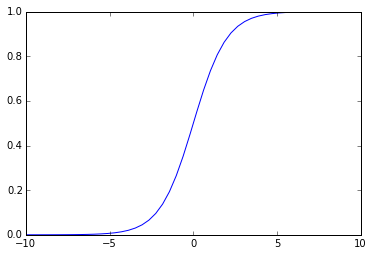

In [17]:
def sigm(x): return 1 / (1 + sp.exp(-x))

xs = sp.linspace(-10, 10)
plt.plot(xs, sigm(xs));

* To get binary decisions, we simply use a threshold of 0.5


* **(2) Error function** (cross-entropy error):

$$
E(\mathbf{w}|\mathcal{D}) = \frac{1}{N} \sum_{i=1}^N\Big( - y^{(i)} \ln h(\mathbf{x}^{(i)}|\mathbf{w})- (1-y^{(i)})\ln \big(1-h(\mathbf{x}^{(i)}|\mathbf{w})\big)\Big)
$$

* Seems convoluted at first, but the idea is actually very simple: 
  * if $y=1$, we want the probability $h(x)$ to be close to 1
  * if $y=0$, we want the probability $h(x)$ to be close to 0
  * the more we depart from this, the more we penalize the model
  

* **(3) Optimization:** 


* Stochastic gradient descent (SGD)


* An iterative fine tuning of the weights $\mathbf{w}$ in search of the point of minimal error


* Very efficient (fast) and guaranteed to find the best weights (best hypothesis within the model)

* In sklearn, all of the above is packed into a single class:

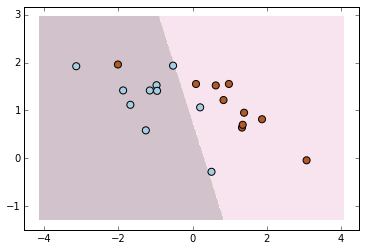

In [18]:
from sklearn.linear_model import LogisticRegression

h = LogisticRegression()
h.fit(X, y)
plot_problem(X, y, h.predict)

In [19]:
h.coef_

array([[ 1.22599752,  0.50208681]])

In [20]:
h.intercept_

array([-0.39974508])

In [21]:
misclassification_error(h.predict, X, y)

0.15

# Feature mapping


* Logistic regression is essentially a linear model. What if our problem is not linearly separable?


* In logistic regression (and many other algorithms), we can map our instances into a **higher dimensional space**, where they hopefully will become linearly separable


* We do this using a **feature mapping function**

$$\phi:\mathbb{R}^n\to\mathbb{R}^m$$


* For example, mapping from a 2-dimensional input space to a 3-dimensional feature space (excluding the dummy feature $x_0$):

$$\phi(\mathbf{x}) = (1,x_1,x_2,x_1 x_2)$$


* [Example: 2-d XOR problem]


* A linear boundary in high-dimensional space gives as a non-linear boundary in the original, low-dimensional space


* We get non-linearity without having to change the model!

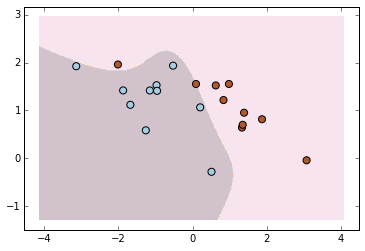

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
X2 = poly.fit_transform(X)

h = LogisticRegression()
h.fit(X2, y)
plot_problem(X, y, lambda x: h.predict(poly.transform(x)))

# Hyperparameters

* We know that we have to choose a model $\mathcal{H}$, otherwise learning is futile


* Often times we choose a model from within a **family** of models:

$$
\{\mathcal{H}_1, \mathcal{H}_2, \dots, \mathcal{H}_k\}
$$


* E.g., in logistic regression, we can choose whether we want to use a feature mapping function, and of what kind


* What mapping to use defines the "amount of non-linearity", and it can be considered a **hyperparameter** of the model


* The "amount of non-linearity" can be considered a **hyperparameter** of the model


* Let's call this parameter $C$. The larger $C$, the more non-linearity we get


* $C$ is a **hyperparameter** of the model, whereas $w_i$ are just "ordinary" parameters




# Example: Logistic regression

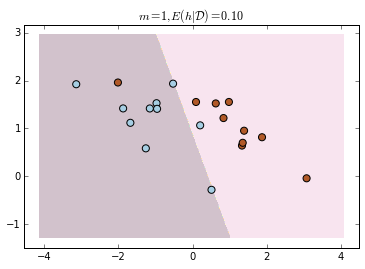

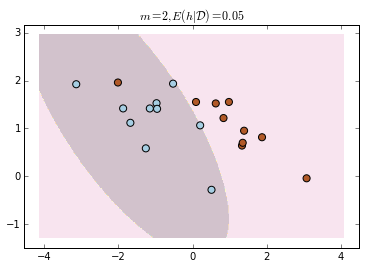

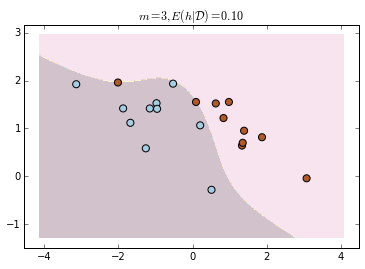

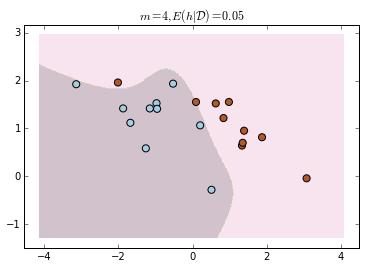

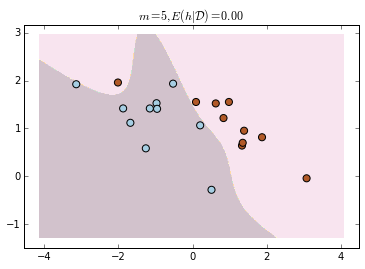

In [23]:
from sklearn.preprocessing import PolynomialFeatures


for m in [1, 2, 3, 4, 5]:
    poly = PolynomialFeatures(m)
    X2 = poly.fit_transform(X)
    h = LogisticRegression()
    h.fit(X2, y)
    plot_problem(X, y, lambda x: h.predict(poly.transform(x)))
    error = misclassification_error(lambda x : h.predict(poly.transform(x)), X, y)
    plt.title('$m = %d, E(h|\mathcal{D})=%.2f$' % (m, error))
    plt.show()

* Which model is the best?

# The problem of noise

* **Noise** is an unwanted anomaly in the data


* Possible causes:
  * Imprecision
  * Mislabeling ("teacher noise")
  * Latent variables
  * Vague class boundaries (subjectivity)


* Noise makes the boundary between two classes more complex than it really should be!


* [Example 1: credit risk assessment according to age and income]


* Simple models cannot reach $E(h|\mathcal{D})=0$


* On the other hand, models that are too complex learn noise rather than the true classification!


* [Example 2]


* In principle, we cannot separate the noise from genuine data (we can do this only for notorious outliers)

# Model selection

* Obviously, the larger the capacity of $\mathcal{H}$, the lower $E(h|\mathcal{D})$, for the best $h\in\mathcal{H}$


* However, if we choose a model that is **too complex**, it will **fit the noise** and won't be able to **generalize**


* **Generalization:** The ability to correctly predict the labels of previously unseen instances


* We prefer simpler models because they:
  * generalize better
  * are easier to train and use
  * are easier to interpret


* On the other hand, if the model is too simple, it won't be able to capture the regularities in the data


* Thus, we need a model that is neither too complex nor too simple, a model that is **just right** for our problem!


* **Occam's razor**

<img src="http://muslimsi.com/wp-content/uploads/2014/12/quote-occam-s-razor-no-more-things-should-be-presumed-to-exist-than-are-absolutely-necessary-i-e-the-william-of-occam-372636-846x398.jpg" width="70%" align="left">





* Two extremes:

  * **Underfitting** - $\mathcal{H}$ is too simple for our problem $\Rightarrow$ works bad on existing as well as unseen data

  * **Overfitting** - $\mathcal{H}$ is too complex for our problem $\Rightarrow$ works excellent on existing data but fails miserably on unseen data
  
  
* [Example: under/overfitting]


* Our task is to choose a model of the right complexity: neither underfitted nor overfitted 


* This is called **model selection**
  * Other names: model optimization, hyperparameter optimization, bias-variance tradeoff


* **IMPORTANT:** Model selection is your job, not the job of an ML algorithm. An ML algorithm is responsible for optimizing the "ordinary" parameters $\boldsymbol\theta$. You are responsible for optimizing the hyperparameters of the model (if there are any). Don't blame the algorithm if you've chosen a bad model.




# The assumption of inductive learning

> If **(1)** the error of the hypothesis on a sufficiently large dataset is small and **(2)** the model is not too complex, the hypothesis will also classify well all the previously unseen, but **(3)** similar instances.

# Cross-validation

* A method to estimate how well the model generalizes


* Generalization is the ability to work well on unseen data. Although we don't have the unseen data at our disposal, we can **simulate** this setup using the data that we have


* We divide the dataset into a **training set** and a **test set**:
     $$
        \mathcal{D} = \mathcal{D}_{\mathrm{train}} \cup \mathcal{D}_{\mathrm{test}}
     $$
     

* We train the model on the first set and test on the second set


* Because the instances from the test set are not used for training, the model won't see them until it is too late (testing time), so we get a fair estimate of how well the model generalized


* We calculate two errors of $h\in\mathcal{H}$:
    * **Train error**: the empirical error on the train set, $E(h|\mathcal{D}_{\mathrm{train}})$
    * **Test error**: the empirical error on the test set, $E(h|\mathcal{D}_{\mathrm{test}})$ 


* Discussion:
    * Imagine you have a family of models
    * The complexity of the model is governed by the hyperparameter $C$: the larger $C$, the more complex the model
    * What do you think: as $C$ increases, will the train error increase?
    * What about the test error?


* [Graph: Train/test error as a function of model complexity]


* $E(h|\mathcal{D}_{\mathrm{train}})$ drops as the complexity increases, while $E(h|\mathcal{D}_{\mathrm{test}})$ typically decreases at first, then increases


* An optimal model is the one that minimizes $E(h|\mathcal{D}_{\mathrm{test}})$


* Discussion:
  * You've trained your model and then tested it on the train set and on the test set
  * You get a very low train error but a high test error. What can you conclude?
  * How would you go about fixing this?

# Example: Logistic regression

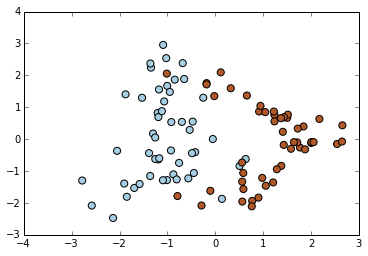

In [24]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2, random_state=53)
plot_problem(X, y)

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [26]:
print sp.shape(X_train), sp.shape(y_train)

(70, 2) (70,)


In [27]:
print sp.shape(X_test), sp.shape(y_test)

(30, 2) (30,)


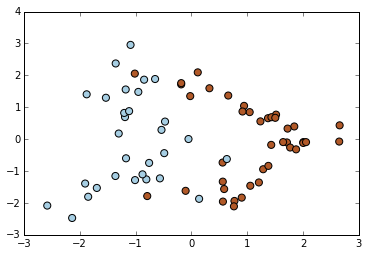

In [28]:
plot_problem(X_train, y_train)

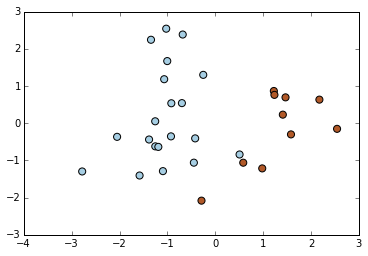

In [29]:
plot_problem(X_test, y_test)

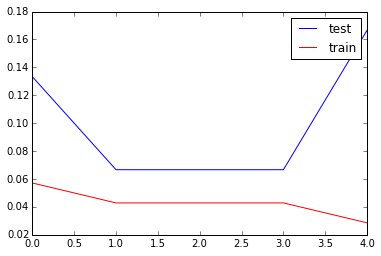

In [30]:
from sklearn.metrics import zero_one_loss

train_errs, test_errs = [], []
for m in range(1, 6) :
    poly=PolynomialFeatures(m)
    X2 = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)
    h = LogisticRegression()
    h.fit(X_train,y_train)
    train_err = zero_one_loss(y_train,h.predict(X_train))
    test_err = zero_one_loss(y_test,h.predict(X_test))
    train_errs = append(train_errs, train_err)
    test_errs = append(test_errs, test_err)
plot(test_errs,'b',label="test");
plot(train_errs,'r',label="train")
legend();

# Regularization


* Instead of trying out different feature mappings, a nice trick is simply to map to a rather high dimension, regardless of whether we really need it, but then give preference to simpler models


* That is, we allow the model to become complex if the data calls for it, but we put some pressure on it to stay as simple as possible


* We do this by tweaking the error function so that it penalizes models that become shamelessly non-linear


* You can think of this as a spandex suit: it does stretch as required, but it gets uncomfortable the more it stretches


* This is called **regularization**


* The error function trades off between empirical error and model complexity


* The trade-off is regulated by a **regularization factor** $C$


* If we care more about simplicity, we set $C$ to a small value, otherwise we set it to a large value and get a complex model


* Note that $C$ is again a hyperparameter. We are responsible for defining its value


* This simplifies things a bit, because we don't have to care about feature mapping, but still we have to choose $C$, which means we still have to do model selection

# Cross-validation + model selection


* Cross-validation becomes a bit more complex when we also wish to also optimize the hyperparameters of the model (which is what we want to do in most cases)


* We are not allowed to optimize the hyperparameters on the test set. If we do this, we ruin our experiment, as we  cannot claim that test instances were not seen before by the model


* We need one additional set: **validation set**


* We partition our dataset into three disjoint sets:
    $$
        \mathcal{D} = \mathcal{D}_{\mathrm{train}} \cup \mathcal{D}_{\mathrm{val}} \cup \mathcal{D}_{\mathrm{test}}
    $$
    $$
        \mathcal{D}_{\mathrm{train}} \cap \mathcal{D}_{\mathrm{val}} = 
        \mathcal{D}_{\mathrm{train}} \cap \mathcal{D}_{\mathrm{test}} =
        \mathcal{D}_{\mathrm{val}} \cap \mathcal{D}_{\mathrm{test}} = \emptyset
    $$


# Folded cross-validation

* The problem with train-test split is that it is a **single and arbitrary split**. This makes the error estimate quite **unreliable**


* The alternative is to repeat the splits a couple of times


* We could do that at random, but then we loose control of how many time each instance was used for testing


* Instead, we divide the dataset into $k$ parts (folds) and use each part for testing exactly once (the rest we use for training)


* We report the overall error as the average of the error across the folds

# Algo 2: Support vector machine (SVM)

* Another powerful linear model


* In many respects similar to logistic regression (also a linear model)


* Differences: doesn't output probabilities, uses different error function, and a different optimization procedure


* **(1) The model**:
$$
    h(\mathbf{x}|\mathbf{w}) = \mathbf{1}\{\mathbf{w}^\intercal\mathbf{x} \geq 0\}
$$


* **(2) Error function**:


* Uses the concept of a **margin**: the distance between the boundary and the nearest instance on either side


* Idea: generalization is best when the margin is the largest $\Rightarrow$ **maximum margin**


* Error function is designed to maximize the margin and minimize intrusion into the margin (trying to maintain a "hard margin")


* Regularization factor $C$ (which is a hyperparameter) tells the algorithm whether we prefer a large margin or a hard margin


* **(3) Optimization procedure**:


* Quadratic programming or SGD


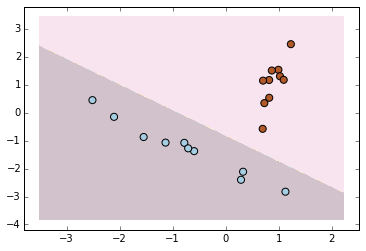

In [31]:
from sklearn.svm import SVC

X, y = make_classification(n_samples=20, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=41)
plot_problem(X, y)

h = SVC(kernel='linear')
h.fit(X, y)
plot_problem(X, y, h.predict)

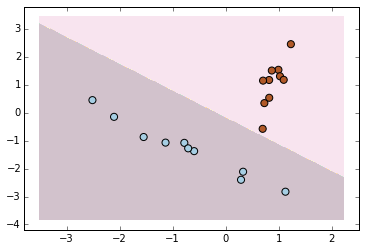

In [32]:
h = LogisticRegression()
h.fit(X, y)
plot_problem(X, y, h.predict)

# Kernel trick

* Similarly to logistic regression, SVM maps instances to high-dimensional spaces to achieve non-linearity


* However, unlike in logistic regression, the mapping need not really take place: SVM can compute the boundary without actually doing the mapping, using a **kernel function**


* Different kernel functions give different non-linearities


* Two extremes: **linear kernel** (equivalent to not using a mapping at all) and a **radial basis function (RBF) kernel**


* RBF kernel effectively maps to an infinite-dimension space, in which each problem becomes linearly separable

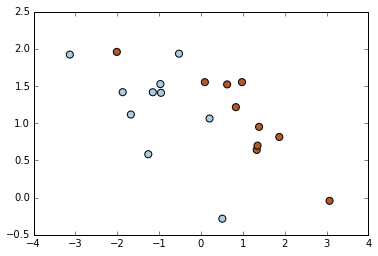

In [33]:
X, y = make_classification(n_samples=20, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
plot_problem(X, y)

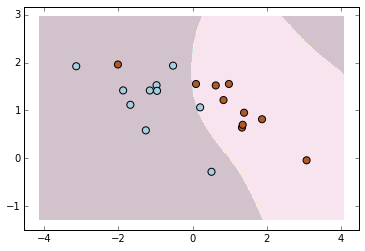

In [34]:
h = SVC(kernel='rbf', C=1)
h.fit(X, y)
plot_problem(X, y, h.predict)

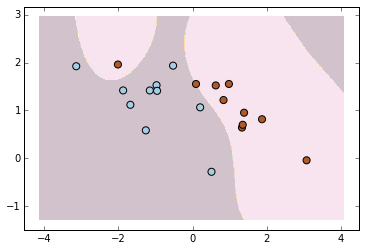

In [35]:
h = SVC(kernel='rbf', C=10^5)
h.fit(X, y)
plot_problem(X, y, h.predict)

* SVM+RBF is a powerful model, but be aware of overfitting!


* If you use SVM+RBF, then there are two hyperparameters: $C$ and $\gamma$


* You need to cross-validate the model across a range of $(C,\gamma)$ values. Use **grid search** for that

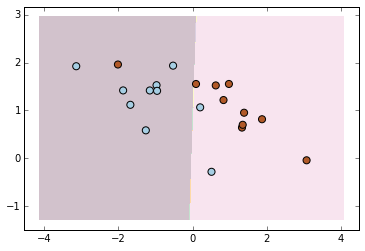

In [36]:
from sklearn.grid_search import GridSearchCV

param_grid = [{'C': [2**x for x in range(-5,5)], 'gamma': [2**x for x in range(-5,5)]}]
h = GridSearchCV(SVC(), param_grid)
h.fit(X, y)
plot_problem(X, y, h.predict)

# Algo 3: Decision tree

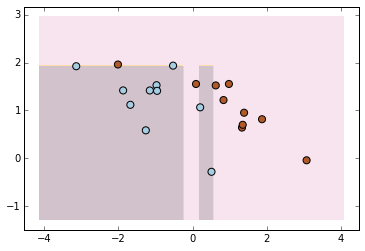

In [37]:
from sklearn import tree
h = tree.DecisionTreeClassifier()
h.fit(X, y)
plot_problem(X, y, h.predict)

In [38]:
from sklearn.externals.six import StringIO  
import pyparsing
import pydot
from IPython.display import Image
dot_data = StringIO() 
tree.export_graphviz(h, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
img = Image(graph.create_png())

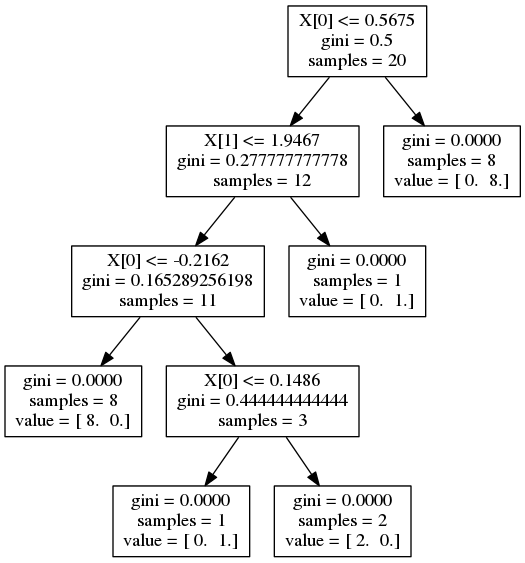

In [39]:
img.width=300; img

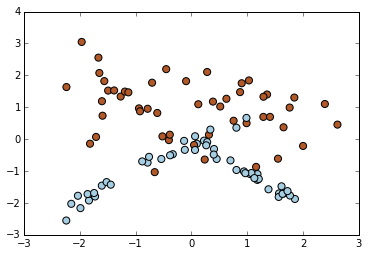

In [40]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2, random_state=54)
plot_problem(X, y)

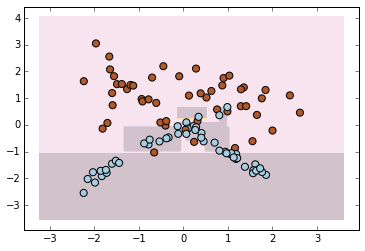

In [41]:
h = tree.DecisionTreeClassifier()
h.fit(X, y)
plot_problem(X, y, h.predict)

In [42]:
misclassification_error(h.predict, X, y)

0.0

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

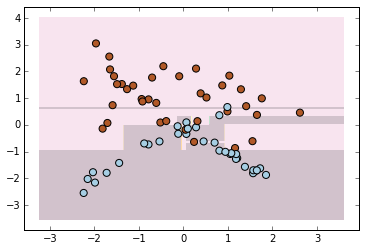

In [44]:
h.fit(X_train, y_train)
plot_problem(X_train, y_train, h.predict)

In [45]:
misclassification_error(h.predict, X_train, y_train)

0.0

In [46]:
misclassification_error(h.predict, X_test, y_test)

0.1

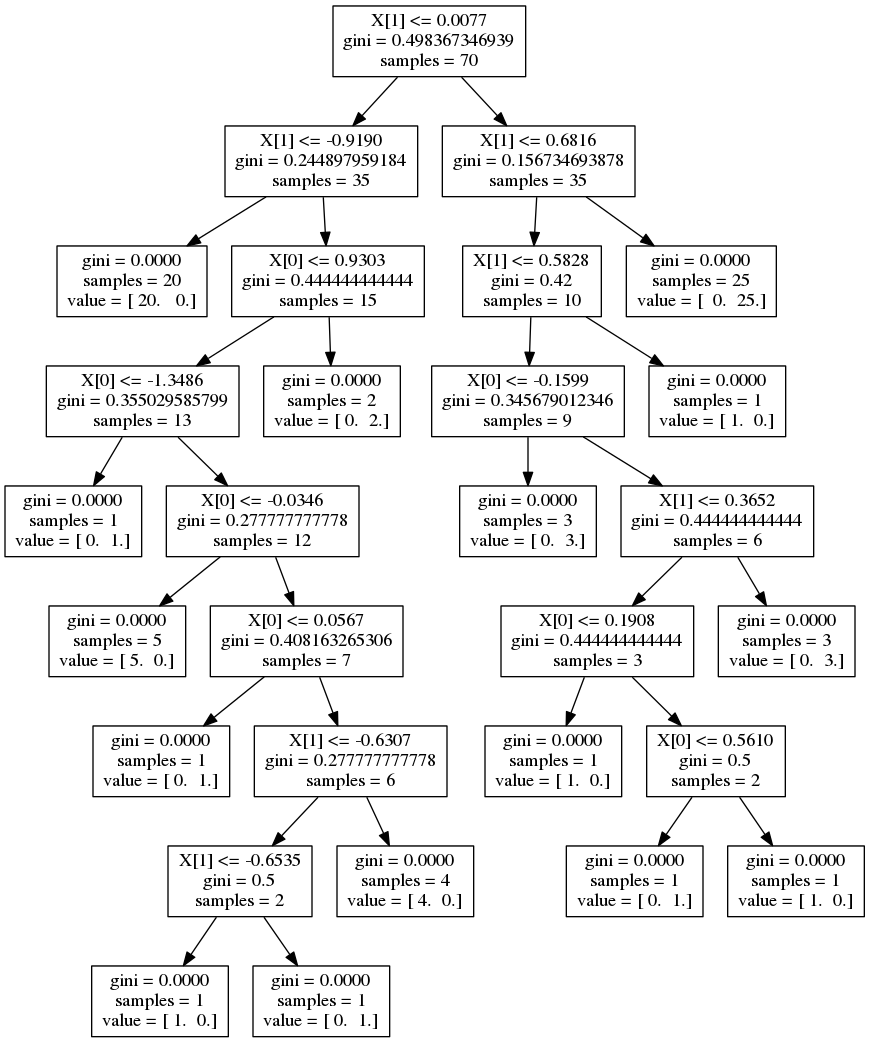

In [47]:
dot_data = StringIO() 
tree.export_graphviz(h, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
img = Image(graph.create_png())
img.width=500; img

In [48]:
h = tree.DecisionTreeClassifier(max_depth=3)
h.fit(X_train, y_train);

In [49]:
misclassification_error(h.predict, X_train, y_train)

0.07142857142857142

In [50]:
misclassification_error(h.predict, X_test, y_test)

0.1

# Algo 4: Naive Bayes classifier

* The above three models are **discriminative**


* Naive Bayes (NB) is a **generative model**. This means that it not only computes the boundary between the classes, but also the **joint probability distribution** of instances and their labels, $P(\mathbf{x},y)$


* Uses the Bayes' rule:
$$
P(y=j|\mathbf{x}) = 
\frac{P(\mathbf{x},y=j)}{P(\mathbf{x})} = 
\frac{p(\mathbf{x}|y=j) P(y=j)}{p(\mathbf{x})} =
\frac{p(\mathbf{x}|y=j)P(y=j)}{\sum_{k=1}^K p(\mathbf{x}|y=k)P(y=k)}
$$


* **(1) The model**:
$$
h(\mathbf{x}) = \mathrm{argmax}_{j}\ p(\mathbf{x}|y=j) P(y=j)
$$

* Or, if we want probabilities for each class:

$$h_j(\mathbf{x})=P(y=j|\mathbf{x})$$


* We introduce the "naive assumption" that, given a class, all features are mutually independent. The model simplifies to:


$$
h(\mathbf{x}) = \mathrm{argmax}_j\ P(y=j)\prod_{k=1}^n P(x_k|y=j)
$$


* **(2) Error function**:


* NB seeks to maximize the likelihood of the training data under the model (parameters):

$$
\mathcal{L}(\boldsymbol{\theta} | \mathcal{D}) \equiv
 p(\mathcal{D} | \boldsymbol{\theta}) = 
 p\big((\mathbf{x}^{(1)},y^{(1)}),\dots,(\mathbf{x}^{(N),y^{(N)}}) | \boldsymbol{\theta}\big) = 
\prod_{i=1}^N p(\mathbf{x}^{(i)}, y^{(i)} | \boldsymbol{\theta})\ 
$$

* In other words: it chooses the parameters $\boldsymbol\theta$ that make our data most probable


* **(3) Optimization procedure**:


* Parameter optimization in this case is amounts to **parameter estimation** from the dataset


* We need to estimate $P(\mathbf{x}|y)$ (likelihood) and $P(y)$ (prior) for each class $y$


* We can use a **maximum likelihood estimator (MLE)**, a **maximum aposteriori estimator (MAP)** or a **bayesian estimator**


* The latter two account for data sparsity and avoid overfitting


* MLE is the simplest: simply compute probabilities as the relative frequencies


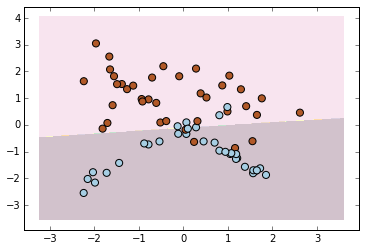

In [51]:
from sklearn.naive_bayes import GaussianNB
h = GaussianNB()
h.fit(X_train, y_train)
plot_problem(X_train, y_train, h.predict)


* NB: Naive Bayes has no hyperparameters. Hence, you don't need to bother with model selection

# Summary

* A **hypthesis** is a function that classifies the instances, while a **model** is a set of hypotheses


* Different models have different **complexities** (capacities)


* Learning is not possible without **inductive bias**, which can be a **language bias** or a **preference bias**


* Every ML algorithm has three key components: **model**, **error function**, **optimization procedure**


* Learning amounts to **optimizing model parameters** using the **empirical error** as the objective function


* A model that is **underfitted** or **overfitted** does not generalize well


* **Model selection** or **hyperparameter optimization** means selecting the model of optimal complexity


* We use **cross-validation** to estimate the **generalization error** and select an optimal model for our problem


* **Logistic regression** is a linear classifier, which can solve non-linear problems using **feature mapping** into higher-dimensional spaces


* **Support vector machine** is another linear classifier, which seeks to maximize the margin between classes, and uses a **kernel trick** to deal with non-linearity
